<a href="https://colab.research.google.com/github/Emenike-Amara/Projects/blob/main/Data_Exploration_with_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is geared towards understanding the sales trend recorded for the period in review and the performance of the different business outlets.

In [ ]:
!pip install sqlite3

In [52]:
#Python's built-in sqlite3 module to create an in-memory SQLite database as I do not a live connection

import sqlite3

conn = sqlite3.connect(':memory:')

In [ ]:
!pip install pandas pandasql

In [53]:
from pandas.io.sql import PandasSQL

In [54]:
#Loading data and declaring path reference
import pandas as pd
from pandasql import sqldf
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/My Drive/Features data set.csv'
path2= '/content/drive/My Drive/sales data-set.xlsx'
path3 = '/content/drive/My Drive/stores data-set.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Table 1 

feature_data = pd.read_csv(path1)
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [56]:
# Table 2 

sales_data = pd.read_excel(path2)
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN
1,1,2,2010-02-05,50605.27,False,NaN,NaN,NaN
2,1,3,2010-02-05,13740.12,False,NaN,NaN,NaN
3,1,4,2010-02-05,39954.04,False,NaN,NaN,NaN
4,1,5,2010-02-05,32229.38,False,NaN,NaN,NaN


In [57]:
# Table 3

store_data = pd.read_csv(path3)
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [58]:
feature_data.to_sql('feature_data', conn, index=False)

8190

In [ ]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM feature_data ')
results = cursor.fetchall()
results

In [60]:
#Introducing my SQL Queries

SQLquery = '''
SELECT *
FROM sales_data
limit 5
'''
result = sqldf(SQLquery)
result

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,1,2010-02-05 00:00:00.000000,24924.50,0,None,None,None
1,1,2,2010-02-05 00:00:00.000000,50605.27,0,None,None,None
2,1,3,2010-02-05 00:00:00.000000,13740.12,0,None,None,None
3,1,4,2010-02-05 00:00:00.000000,39954.04,0,None,None,None
4,1,5,2010-02-05 00:00:00.000000,32229.38,0,None,None,None


In [ ]:
# How many stores do we have 

SQLquery = '''
SELECT distinct store
FROM sales_data
'''
result = sqldf(SQLquery)
result



In [110]:
# How total_sales per store 

SQLquery = '''
SELECT  store, Round(sum(weekly_sales),2) as sales
FROM sales_data
group by 1
'''
result = sqldf(SQLquery)
result


,Store,sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [109]:
# How weekly sales per store/dept

SQLquery = '''
select week||'/'||year as "week/year", weekly_sales, store, dept
from (
SELECT (strftime('%W',Date)) as week,(strftime('%Y',Date)) as year,
 --((strftime('%W',Date))||'_'||(strftime('%yyyy',Date))) as 'week_year',
  weekly_sales, store , dept
FROM sales_data
order by 1 desc
)

'''
result = sqldf(SQLquery)
result

,week/year,weekly_sales,store,dept
0,52/2010,19124.58,1,1
1,52/2010,35819.83,1,2
2,52/2010,8266.14,1,3
3,52/2010,36913.80,1,4
4,52/2010,32280.82,1,5
...,...,...,...,...
421565,01/2012,1893.85,45,93
421566,01/2012,3957.39,45,94
421567,01/2012,48132.76,45,95
421568,01/2012,6701.06,45,97


In [118]:
# pct_change in weekly sales

SQLquery = '''

WITH sales_cte AS (
  select week||'/'||year as "week/year", curr_sales, prev_sales, date
from (
SELECT (strftime('%W',Date)) as week,(strftime('%Y',Date)) as year,date,
 sum(weekly_sales) as "curr_sales", LAG(sum(weekly_sales)) OVER (ORDER BY date) AS "prev_sales" 
FROM sales_data
group by 1,2
)
 ) 
SELECT 
  "week/year",date, 
  curr_sales, 
  prev_sales, 
  CASE 
    WHEN prev_sales IS NULL THEN 0 -- handle the first row where there is no previous sales data
    ELSE (curr_sales - prev_sales) * 100.0 / prev_sales 
  END AS pct_change 
FROM sales_cte 
ORDER BY date;

'''
result = sqldf(SQLquery)
result

,week/year,date,curr_sales,prev_sales,pct_change
0,05/2010,2010-02-05 00:00:00.000000,49750740.50,NaN,0.000000
1,06/2010,2010-02-12 00:00:00.000000,48336677.63,49750740.50,-2.842295
2,07/2010,2010-02-19 00:00:00.000000,48276993.78,48336677.63,-0.123475
3,08/2010,2010-02-26 00:00:00.000000,43968571.13,48276993.78,-8.924381
4,09/2010,2010-03-05 00:00:00.000000,46871470.30,43968571.13,6.602214
...,...,...,...,...,...
138,39/2012,2012-09-28 00:00:00.000000,43734899.40,44354547.11,-1.397033
139,40/2012,2012-10-05 00:00:00.000000,47566639.31,43734899.40,8.761287
140,41/2012,2012-10-12 00:00:00.000000,46128514.25,47566639.31,-3.023390
141,42/2012,2012-10-19 00:00:00.000000,45122410.57,46128514.25,-2.181088


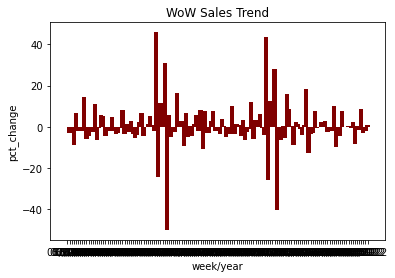

In [131]:
import matplotlib.pyplot as plt
# Extract the x and y values from the results
# x = [row[0] for row in result]
# y = [row[1] for row in result]

x = result['week/year']
y= result['pct_change']

# Create a bar chart
plt.bar(x,y, color ='maroon', width = 2.0)
plt.title("WoW Sales Trend")
plt.xlabel("week/year")
plt.ylabel("pct_change")
plt.show()

In [129]:
# pct_change in weekly sales by store 

SQLquery = '''

WITH sales_cte AS (
  SELECT 
    date, store, dept,
    sum(weekly_sales) curr_sales, 
    LAG(sum(weekly_sales)) OVER (ORDER BY date desc) AS prev_sales 
  FROM sales_data
  group by 2
)
SELECT 
  date, store,dept,
  curr_sales, 
  prev_sales, 
  CASE 
    WHEN prev_sales IS NULL THEN 0 -- handle the first row where there is no previous sales data
    ELSE (curr_sales - prev_sales) * 100.0 / prev_sales 
  END AS pct_change 
FROM sales_cte 
ORDER BY date desc;

'''
store_result = sqldf(SQLquery)
store_result

,date,store,dept,curr_sales,prev_sales,pct_change
0,2010-02-05 00:00:00.000000,45,1,1.123953e+08,NaN,0.000000
1,2010-02-05 00:00:00.000000,44,1,4.329309e+07,1.123953e+08,-61.481421
2,2010-02-05 00:00:00.000000,43,1,9.056544e+07,4.329309e+07,109.191444
3,2010-02-05 00:00:00.000000,42,1,7.956575e+07,9.056544e+07,-12.145564
4,2010-02-05 00:00:00.000000,41,1,1.813419e+08,7.956575e+07,127.914560
5,2010-02-05 00:00:00.000000,40,1,1.378703e+08,1.813419e+08,-23.972186
6,2010-02-05 00:00:00.000000,39,1,2.074455e+08,1.378703e+08,50.464261
7,2010-02-05 00:00:00.000000,38,1,5.515963e+07,2.074455e+08,-73.410069
8,2010-02-05 00:00:00.000000,37,1,7.420274e+07,5.515963e+07,34.523646
9,2010-02-05 00:00:00.000000,36,1,5.341221e+07,7.420274e+07,-28.018541


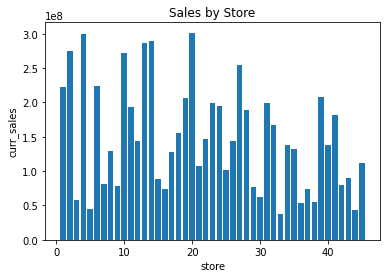

In [132]:
#Visualizing the Sales by store to determine the best performing store

x = store_result['store']
y= store_result['curr_sales']

# Create a line chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('store')
plt.ylabel('curr_sales')
plt.title('Sales by Store')

# Display the chart
plt.show()